# Task 2 - Identifying Trends

## Response Visualizations

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator as ML
from matplotlib.ticker import ScalarFormatter as SF
from matplotlib.ticker import NullLocator as NL
import numpy as np

### Techniques
- Method 0: Animation
- Method 1: MotionRugs
- Method 2: Small Multiples
- Method 3: Streamlines

In [ ]:
# techniques
techniques = {
    "motionRugs": {"id": 1, "name": "MotionRugs", "color":"forestgreen"},
    "animation": {"id": 0, "name": "Animation", "color":"teal"},
    "small_multiples": {"id": 2, "name": "Small Multiples", "color":"mediumpurple"},
    "streamlines": {"id": 3, "name": "Streamlines", "color":"steelblue"},
    }

### Task data

In [ ]:

# task 2 study data:
data_t2 = {
    "animation": [
         {"user": 7,  "values": [1101, 1407, 1761, 2013, 2382] } # user 7
        ,{"user": 9,  "values": [201, 780, 1737] } # user 9
        ,{"user": 13, "values": [591, 801, 1305, 1683, 2352] } # user 13
        ,{"user": 16, "values": [642, 1041, 1248, 1593, 1980] } # user 16
        ,{"user": 22, "values": [123, 678, 969, 1248, 1473, 1572, 2130, 2571] } # user 22
	],
    "motionRugs": [
         {"user": 5,  "values": [738, 1292, 1730, 145] } # user 5
        ,{"user": 8,  "values": [135, 309, 699, 986, 1669, 1931] } # user 8
        ,{"user": 12, "values": [147, 703, 1288, 1575] } # user 12
        ,{"user": 17, "values": [173, 332, 730, 1046, 1652, 2009, 2032, 2269] } # user 17
        ,{"user": 20, "values": [89, 438, 669, 1021, 1276, 1557, 1692, 2007, 2327] } # user 20
	],
    "small_multiples":[
         {"user": 6,  "values": [648, 1188, 1620] } # user 6
        ,{"user": 10, "values": [216, 432, 648, 1080, 1620, 1944, 2160] } # user 10
        ,{"user": 14, "values": [108, 648, 756, 1080, 1620] } # user 14
        ,{"user": 18, "values": [216, 432, 756, 1080, 1296, 1728, 2160] } # user 18
        ,{"user": 21, "values": [216, 648, 756, 1080, 1296, 1512, 1728, 1944, 2268] } # user 21
	],
    "streamlines":[
         {"user": 4,  "values": [324, 648, 1080, 1296, 1620, 1944, 2268] } # user 4
        ,{"user": 11, "values": [432, 756, 1188, 1620, 1944, 2376] } # user 11
        ,{"user": 15, "values": [216, 432, 756, 1296, 1620, 2052] } # user 15
        ,{"user": 19, "values": [864, 1728, 2052] } # user 19
        ,{"user": 23, "values": [864, 1188, 1728, 2268] } # user 23
    ]
}


### Response Chart

In [ ]:
def plot_task(data_, technique, chart_title, output_name):
    """
    Plot data for Task 2.
    """

    fig_grid, axs = plt.subplots(4, 1) # chart per technique
    img = np.flipud(plt.imread(fname="imgs/motionrugevalversion.png")) # add MotionRug as background image to chart for reference
    y = [20,50,80,110,140]
    radius = 5

    fig_grid.set_size_inches(28.125, 9) # 2700 px x 151 px for 600dpi
    fig_grid.set_dpi(600)
    fig_grid.tight_layout(pad=4)
    multiple_locator = ML(50)
    minor_formatter = SF()
    null_locator = NL()
    for idx, technique in enumerate(techniques): # for each technique
        ax = axs[idx]
        data = data_.get(technique)
        color = techniques.get(technique)["color"]    
        sub_label = techniques.get(technique)["name"]              
        
        # chart setup
        ax.imshow(img, alpha=.5, origin="lower") # show MotionRug in background
        ax.set_xlim(0,2700)
        ax.set_ylim(0,151)
        ax.xaxis.set_minor_locator(multiple_locator)
        ax.xaxis.set_minor_formatter(minor_formatter)
        ax.tick_params(axis="x", which="minor", rotation=90, labelsize = 10)
        ax.tick_params(axis="x", which="major", rotation=90, labelsize = 14)
        ax.yaxis.set_major_locator(null_locator)
        ax.set_ylabel(sub_label, fontsize = 18)

        # iterate over each y position to draw user input
        for i in range(len(y)):    
            y_ = y[i]    
            ax.axhline(y=y_-radius, xmin=.001, xmax=1.011, clip_on=False, color="grey").set_dashes((2,2))
            ax.text(2730, y_- 2* radius, f"user-" + str(data[i]["user"]))

            for x in data[i]["values"]: # draw user input as circle      
                circle = plt.Circle((x,y_- radius), 2*radius, fill = False, color=color, linewidth = 3)
                ax.add_artist(circle)   
    plt.suptitle(chart_title, fontsize=20, fontweight= "bold")
    plt.savefig(f"imgs/output/pdf/{output_name}.pdf", dpi=600)
    plt.savefig(f"imgs/output/png/{output_name}.png", dpi=600)
    plt.show()

chart_title = "Task 2 - Identifying Trends"
output_name = "task2_techniques"
plot_task(data_t2, techniques, chart_title, output_name)

## Statistics

## Calculations

In [ ]:
import numpy as np
import math
import pandas as pd

# returns window of overall max distance traveled within window
def get_speed_per_window(df,window_size):

    #reorder to frame-id matrix and fill with according acceleration
    ldf = df.pivot_table(index='t',columns='a',values=['x','y'])
    top = len(ldf) - window_size + 1
    speed_p_window = {}
    print(ldf)
    for i in range(top): # iterate over frames from 0 to last start of window
        win_id = "window_"+ str(i)
        dist_per_window = 0 
        for j in range(len(ldf.iloc[i])//2):
            win_acc_per_fish = win_id + '_' + str(j) 

            dist_per_window_per_fish = 0
            for n in range(0, window_size-1):
                departure_point = (ldf.iloc[i+n]['x'][j], ldf.iloc[i+n]['y'][j]) # go from here
                arrival_point = (ldf.iloc[i+n+1]['x'][j], ldf.iloc[i+n+1]['y'][j]) # to here
                dist_per_window_per_fish = dist_per_window_per_fish + math.hypot(arrival_point[0] - departure_point[0], arrival_point[1] - departure_point[1]) 
            #not working yet! 
            #sum all triple-wise accelerations!
            dist_per_window = dist_per_window + dist_per_window_per_fish
        speed_p_window[win_id] = dist_per_window
    return speed_p_window
speed_p_window = get_speed_per_window(pd.read_csv('fishdataEVAL.csv'),3)


def create_plot(speed_p_window): 
    # First, import the necessary libraries
    import matplotlib.pyplot as plt

    # Extract the data from the dictionary
    windows = speed_p_window.keys()
    speeds = speed_p_window.values()

    xlabels = range(len(speed_p_window.keys())) 


    # Create Figure and Axes instances
    fig,ax = plt.subplots(1)
    fig.set_figwidth(15)
    fig.suptitle('Averaged Speed per Window of 3 Frames')
    # Make your plot, set your axes labels
    ax.plot(windows, speeds)
    ax.set_ylabel('speed')
    ax.set_xlabel('windows')


    ticks = np.arange(0,len(windows),len(windows)//10+1).tolist()
    ticks.append(2700)
    labels = ticks
    # Turn off tick labels
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)

    # Display the chart
    plt.show()



create_plot(speed_p_window)

            x                                                                 \
a         0        1        2        3        4        5        6        7     
t                                                                              
0         NaN   763.38   387.86   331.11   833.81   536.78   945.41   145.63   
1       93.87   762.86   391.10   330.43   833.73   535.68   947.34   147.99   
2       93.99   762.26   394.06   329.85   834.06   534.65   949.05   150.74   
3       94.16   761.71   396.86   329.22   834.60   533.64   950.89   152.53   
4       94.57   761.33   399.67   328.52   835.24   532.64   952.73   153.74   
...       ...      ...      ...      ...      ...      ...      ...      ...   
2696  1801.97  1796.42  1411.40  1450.97  1383.23  1806.53  1435.66  1685.12   
2697  1802.16  1796.48  1411.98  1451.89  1380.44  1807.01  1432.90  1685.70   
2698  1802.35  1796.42  1412.66  1452.93  1377.66  1807.57  1429.75  1687.51   
2699  1802.54  1796.20  1413.30  1454.30

## Completion and Response Statistics

[0    131
1     90
2    112
3    198
4    267
Name: duration_seconds, dtype: int64, 0    30
1    66
2    30
3    77
4    78
Name: duration_seconds, dtype: int64, 0     66
1     77
2     96
3     61
4    107
Name: duration_seconds, dtype: int64, 0    116
1     65
2     83
3     78
4    101
Name: duration_seconds, dtype: int64]
Technique: animation
Total Duration: 798
Duration Mean: 159.6
Duration Median: 131.0
Duration Minimum: 90
Duration Maximum: 267
Duration Variance: 5234.3

Technique: motionrugs
Total Duration: 281
Duration Mean: 56.2
Duration Median: 66.0
Duration Minimum: 30
Duration Maximum: 78
Duration Variance: 594.2

Technique: small_multiples
Total Duration: 407
Duration Mean: 81.4
Duration Median: 77.0
Duration Minimum: 61
Duration Maximum: 107
Duration Variance: 385.3

Technique: streamlines
Total Duration: 443
Duration Mean: 88.6
Duration Median: 83.0
Duration Minimum: 65
Duration Maximum: 116
Duration Variance: 401.3

animation
Total #answers 26
Mean #answers 5.2
Median 

C:\Users\Raphael\AppData\Local\Temp\ipykernel_26336\3972850423.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Animation", "MotionRugs","Small Multiples", "Streamlines"])


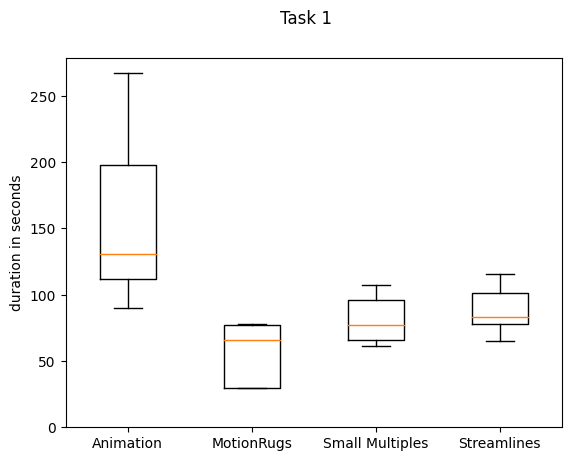

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
import ast
import statistics

# Create your connection.
cnx = sqlite3.connect('motionrugs.db')

qu_start = "SELECT id, Cast ((JulianDay(end_time) - JulianDay(start_time)) * 24 * 60 * 60 As Integer) as duration_seconds FROM tracking where task_id in (SELECT id from tasks WHERE group_id = "
qu_end = " AND task_type = 1)"

duration_data = []
for i in range(4):
    qu = qu_start + str(i) + qu_end
    duration_frame = pd.read_sql_query(qu, cnx)
    duration_data.append(duration_frame["duration_seconds"])
cnx.commit()
cnx.close()


techniques = ["animation", "motionrugs", "small_multiples", "streamlines"]
    
print(duration_data)
# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.set_ylabel('duration in seconds')
ax.set_xticklabels(["Animation", "MotionRugs","Small Multiples", "Streamlines"])
fig.suptitle('Task 1')
ax.boxplot(duration_data)
plt.ylim(ymin=0)
#plt.show()

# Process each series in the dataset
for i, series in enumerate(duration_data):
    print(f"Technique: {techniques[i]}")
    print("Total Duration:", series.sum())
    print("Duration Mean:", series.mean())
    print("Duration Median:", series.median())
    print("Duration Minimum:", series.min())
    print("Duration Maximum:", series.max())
    print("Duration Variance:", series.var())
    print()




# user duration
cnx = sqlite3.connect('motionrugs.db')

qu_start = "SELECT * FROM tracking where task_id in (SELECT id from tasks WHERE group_id = "
qu_end = " AND task_type = 1)"


tracking_data = {}
for i in range(4):
    qu = qu_start + str(i) + qu_end
    tracking_frame = pd.read_sql_query(qu, cnx)
    tracking_data[techniques[i]] = tracking_frame
cnx.commit()
cnx.close()



#user actions

for t in techniques:
    print(t)
    ev = {}
    task_d = tracking_data[t]["task_data"]
    
    # Convert the string representations of nested lists to actual lists
    a = task_d.apply(ast.literal_eval)

    # Collect the count of items in each sublist
    item_counts = [len(sublist) for sublist in a]

    # Calculate the mean
    mean_items = sum(item_counts) / len(item_counts)

    # Calculate the median
    median_items = statistics.median(item_counts)

    # Calculate the maximum and minimum
    max_items = max(item_counts)
    min_items = min(item_counts)

    # Calculate the variance
    variance_items = statistics.variance(item_counts)

    # Calculate the total number of items
    total_items = sum(item_counts)

    print("Total #answers", total_items)
    print("Mean #answers", mean_items)
    print("Median #answers", median_items)
    print("Maximum #answers", max_items)
    print("Minimum #answers", min_items)
    print("Variance #answers", variance_items)

    print("-------------")


C:\Users\Raphael\AppData\Local\Temp\ipykernel_26336\145773254.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Animation", "MotionRugs","Small Multiples", "Streamlines"])


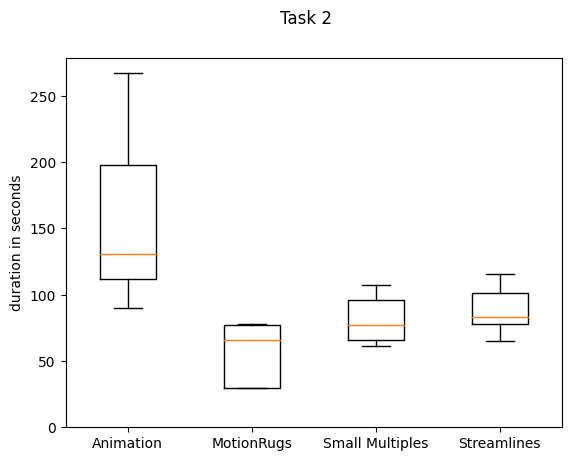

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon


# Create your connection.
cnx = sqlite3.connect('motionrugs.db')

qu_start = "SELECT id, Cast ((JulianDay(end_time) - JulianDay(start_time)) * 24 * 60 * 60 As Integer) as duration_seconds FROM tracking where task_id in (SELECT id from tasks WHERE group_id = "
qu_end = " AND task_type = 1)"

duration_data = []
for i in range(4):
    qu = qu_start + str(i) + qu_end
    duration_frame = pd.read_sql_query(qu, cnx)
    duration_data.append(duration_frame["duration_seconds"])
cnx.commit()
cnx.close()


# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.set_ylabel('duration in seconds')
ax.set_xticklabels(["Animation", "MotionRugs","Small Multiples", "Streamlines"])
fig.suptitle('Task 2')
ax.boxplot(duration_data)
plt.ylim(ymin=0)
plt.show()